# CS4186 Assignment 1: CNN model

Importing All Libraries

In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.autograd import Variable
import cv2
import os
import numpy as np
import torchvision.models as models
import torchvision.transforms as transforms
from tqdm import tqdm
from matplotlib import pyplot as plt

from utils import query_crop, similarity_cosine, similarity_distance,similarity_pearson, visualization, retrival_idx

In [2]:
plt.rcParams["figure.figsize"] = (10,10)

Parameters

In [3]:
grayscale = False
generate_features = False
similarity = 'euclidean'

## Helper Functions

In [4]:
def extraction(img, featsave_path):
    conv_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])])
    img_transform = conv_transform(img).to(device) #normalize the input image and transform it to tensor.
    
    img_transform = torch.unsqueeze(img_transform, 0) #Set batchsize as 1. You can enlarge the batchsize to accelerate.
    
    feats = cnn_model(img_transform) # extract feature
    feats_np = feats.cpu().detach().numpy() # convert tensor to numpy
    np.save(featsave_path, feats_np, allow_pickle=True) # save the featur

def feat_extractor_gallery(gallery_dir, feat_savedir):
    for img_file in tqdm(os.listdir(gallery_dir)):
        img = cv2.imread(os.path.join(gallery_dir, img_file))
        img = img[:,:,::-1] #bgr2rgb
        img_resize = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC) # resize the image
        if grayscale==True:
            img_resize = cv2.cvtColor(img_resize, cv2.COLOR_BGR2HSV)
        featsave_path = os.path.join(feat_savedir, img_file.split('.')[0]+'.npy')
        extraction(img_resize, featsave_path)

# Extract the query feature
def feat_extractor_query():
    query_dir = './datasets_4186/query_4186/'
    txt_dir = './datasets_4186/query_txt_4186/'
    save_dir =  './datasets_4186/query_cropped/'
    featsave_dir = './datasets_4186/query_feature/'
    for query_file in tqdm(os.listdir(query_dir)):
        if query_file.endswith(".DS_Store"):
            continue
        print(query_file)
        img_name = query_file[0:query_file.find('.')]
        txt_file = img_name+'.txt'
        featsave_file = img_name+'_feats.npy'
        query_path = os.path.join(query_dir, query_file)
        txt_path = os.path.join(txt_dir, txt_file)
        save_path = os.path.join(save_dir, query_file)
        featsave_path =os.path.join(featsave_dir, featsave_file) 
        crop = query_crop(query_path, txt_path, save_path)
        crop_resize = cv2.resize(crop, (224, 224), interpolation=cv2.INTER_CUBIC)
        if grayscale==True:
            crop_resize = cv2.cvtColor(crop_resize, cv2.COLOR_BGR2HSV)
        extraction(crop_resize, featsave_path)

## Defining the Model

In [5]:
device = 'cuda' if torch.cuda.is_available()==True else 'cpu'


if grayscale == True:
    cnn_model = models.vgg19(pretrained=True)
    first_layer = [nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, dilation=1, groups=1, bias=True)]
    first_layer.extend(list(cnn_model.features))
    cnn_model.features = nn.Sequential(*first_layer)
else:
    cnn_model = models.vgg19(pretrained=True).to(device)
    cnn_model_features = cnn_model.features
    cnn_model_features.eval()
cnn_model = cnn_model.to(device)

## Main Function

Responsible for Extracting Features

In [6]:
if generate_features==True:
    feat_extractor_query()

    gallery_dir = './datasets_4186/gallery_4186/'
    feat_savedir = './datasets_4186/gallery_feature/'

    feat_extractor_gallery(gallery_dir, feat_savedir)


4154 0.72826314
2654 0.727927
2941 0.71570015
3290 0.70881176
2403 0.706043
2979 0.7039628
700 0.6985487
1389 0.6949137
2138 0.69491345
4700 0.69278425
Q1: 4154 2654 2941 3290 2403 2979 700 1389 2138 4700 


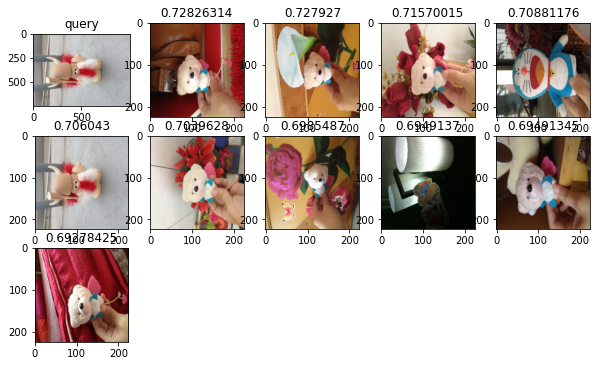

2003 0.85905504
3875 0.8257521
2369 0.7948911
934 0.7825265
1822 0.78105336
1227 0.78104675
2828 0.78087175
839 0.7781242
988 0.77724695
2630 0.77631205
Q2: 2003 3875 2369 934 1822 1227 2828 839 988 2630 


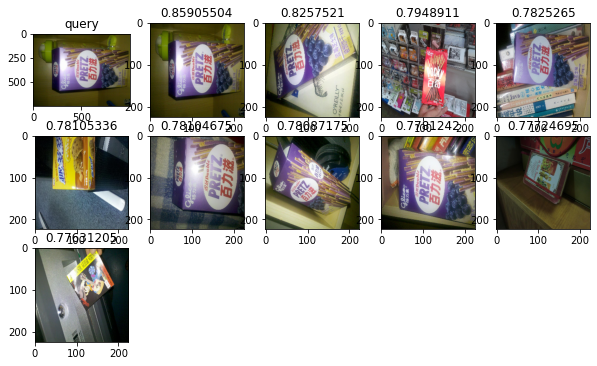

4012 0.7744283
2353 0.76897943
2857 0.7636061
852 0.7498996
137 0.74701244
2939 0.7455289
961 0.7437004
2208 0.7400434
2571 0.7366576
2935 0.73373234
Q3: 4012 2353 2857 852 137 2939 961 2208 2571 2935 


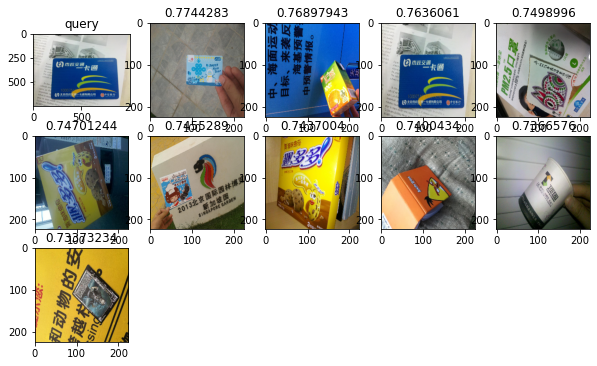

2318 0.6904962
4768 0.6766362
3412 0.6628724
866 0.6560542
916 0.65364736
4859 0.64962053
2326 0.6457983
1060 0.64432347
721 0.6431514
1280 0.64240545
Q4: 2318 4768 3412 866 916 4859 2326 1060 721 1280 


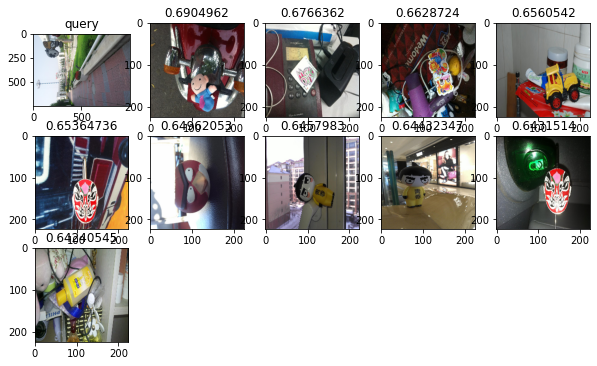

2666 0.8843659
2711 0.78516316
4137 0.7645155
2125 0.7542982
4901 0.75356865
1080 0.75288844
1087 0.7524617
4288 0.75043106
3259 0.7474623
4647 0.7448442
Q5: 2666 2711 4137 2125 4901 1080 1087 4288 3259 4647 


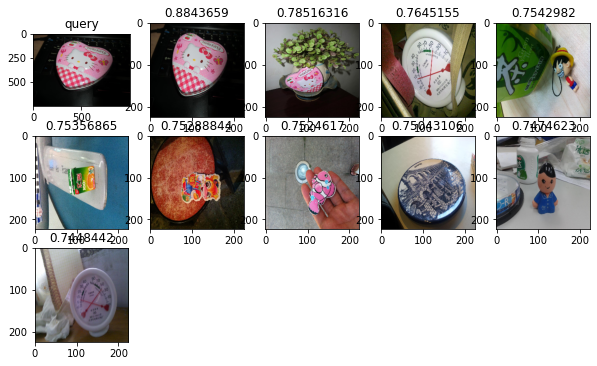

1854 0.78038317
672 0.74951595
3314 0.74275213
709 0.738456
4995 0.73511565
4948 0.7341268
1978 0.7337353
1048 0.7336472
1468 0.73330736
503 0.7324076
Q6: 1854 672 3314 709 4995 4948 1978 1048 1468 503 


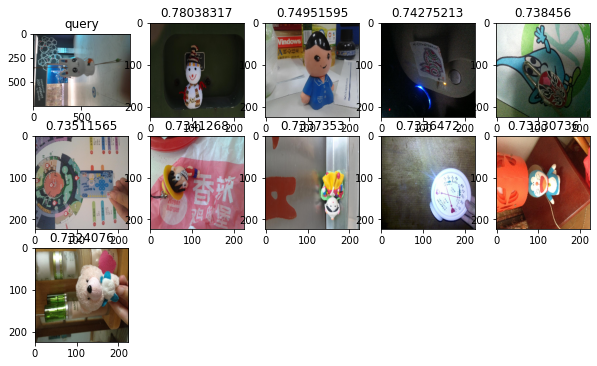

3362 0.81132114
1044 0.786855
189 0.77996176
280 0.7798972
1598 0.7795811
236 0.77028924
362 0.76731044
298 0.7656863
2213 0.7546335
4296 0.75432026
Q7: 3362 1044 189 280 1598 236 362 298 2213 4296 


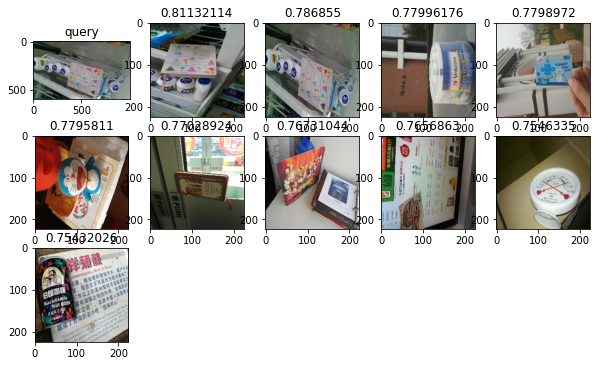

4256 0.72658587
3655 0.7089598
250 0.6980975
2126 0.68822026
4048 0.6758908
1505 0.6690059
2402 0.66776896
1428 0.6672066
4012 0.6661852
1560 0.6652864
Q8: 4256 3655 250 2126 4048 1505 2402 1428 4012 1560 


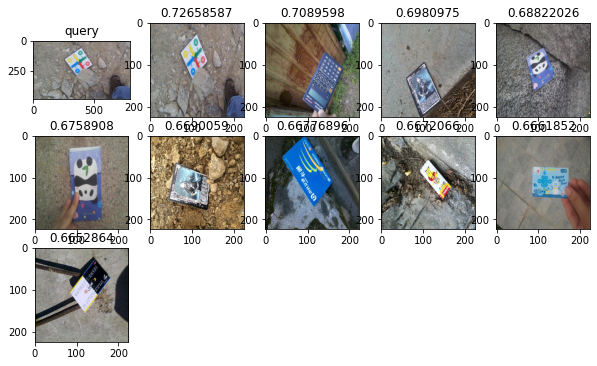

3525 0.6904868
655 0.6669333
4689 0.6650677
1518 0.6650107
206 0.65782475
1095 0.65526104
3647 0.6516737
3966 0.6509083
991 0.6489581
4077 0.6405387
Q9: 3525 655 4689 1518 206 1095 3647 3966 991 4077 


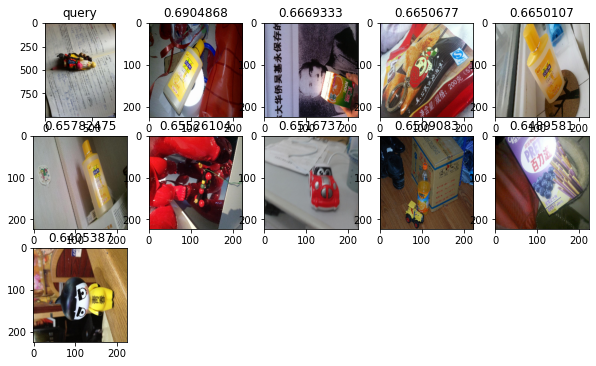

1132 0.8286744
3113 0.8263595
672 0.8023958
1411 0.79257566
2666 0.791131
843 0.7868421
467 0.7813529
2125 0.78021777
981 0.7785152
4974 0.7767376
Q10: 1132 3113 672 1411 2666 843 467 2125 981 4974 


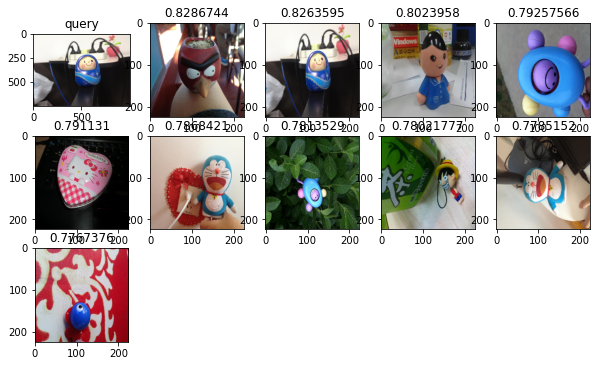

988 0.87497336
961 0.8421146
4296 0.8413824
3493 0.8216506
643 0.8199816
4901 0.8149892
298 0.80884814
2666 0.80863094
852 0.80788565
3456 0.8051233
Q11: 988 961 4296 3493 643 4901 298 2666 852 3456 


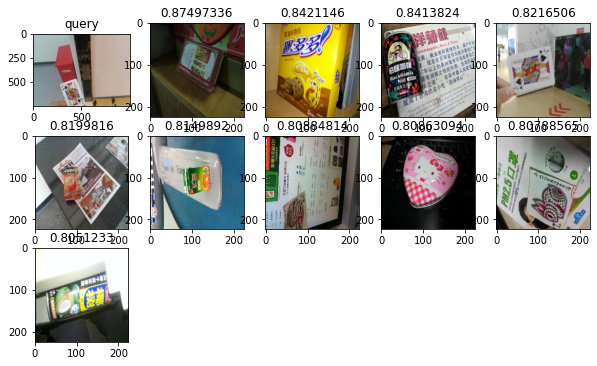

3166 0.8593905
4325 0.80870277
1426 0.8068787
54 0.80647254
4315 0.80156404
2286 0.8014046
4671 0.80114114
231 0.79636526
810 0.7950454
128 0.7943737
Q12: 3166 4325 1426 54 4315 2286 4671 231 810 128 


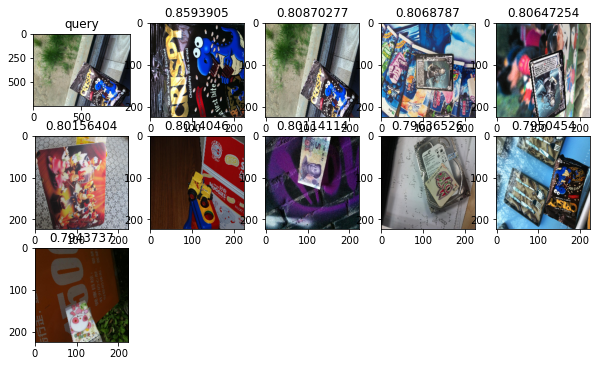

4135 0.70675933
86 0.6728407
4764 0.65797305
146 0.65702987
4208 0.6510266
1035 0.6476864
3330 0.64457965
3785 0.6434888
1888 0.64164406
926 0.6406388
Q13: 4135 86 4764 146 4208 1035 3330 3785 1888 926 


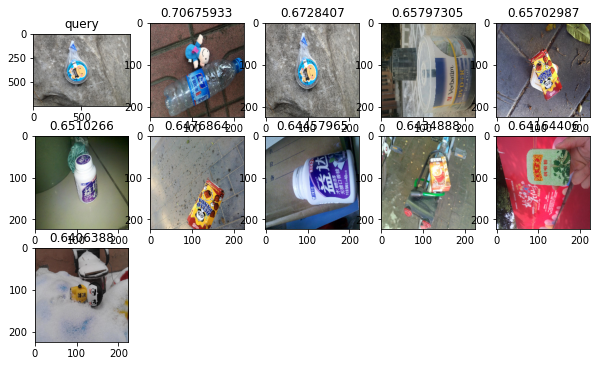

503 0.80513287
2529 0.7952132
4155 0.78143054
672 0.7784781
981 0.7775678
2815 0.7721498
843 0.7707856
1468 0.7686453
1038 0.76624244
3663 0.76543695
Q14: 503 2529 4155 672 981 2815 843 1468 1038 3663 


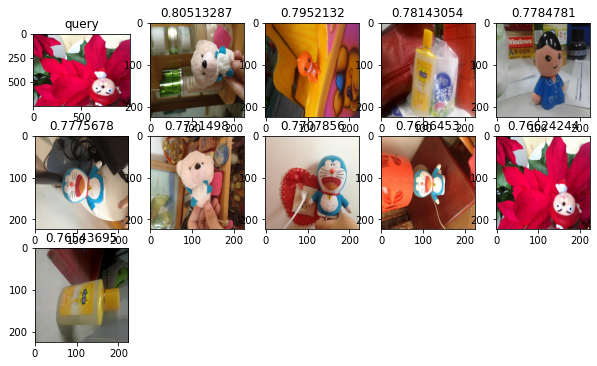

4372 0.6700454
3856 0.6675285
2311 0.66064954
1441 0.6428851
4670 0.64231205
4153 0.64221275
1697 0.6335479
456 0.6333884
1561 0.63048214
985 0.6271781
Q15: 4372 3856 2311 1441 4670 4153 1697 456 1561 985 


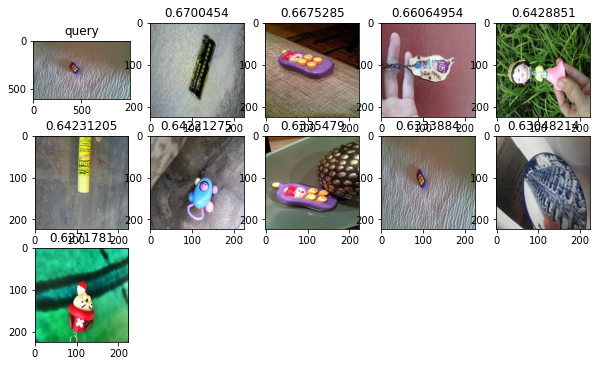

2 0.8375654
5012 0.7212266
261 0.7082014
19 0.70702016
1690 0.7062824
1807 0.6940761
2458 0.69206774
190 0.6913291
1524 0.69111633
712 0.69037634
Q16: 2 5012 261 19 1690 1807 2458 190 1524 712 


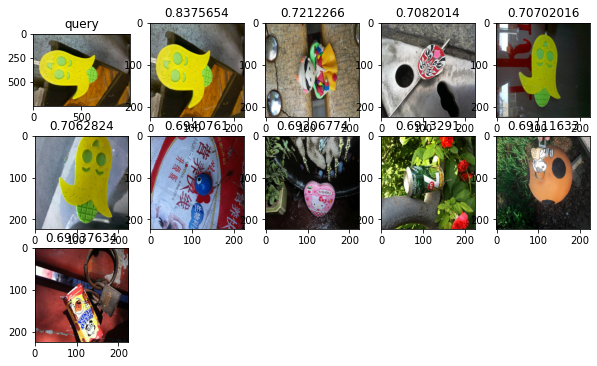

2353 0.7344811
79 0.73318565
2890 0.6998984
3543 0.6975883
463 0.69313323
4536 0.69290745
2703 0.69028616
2602 0.6879185
881 0.6833043
3875 0.6822634
Q17: 2353 79 2890 3543 463 4536 2703 2602 881 3875 


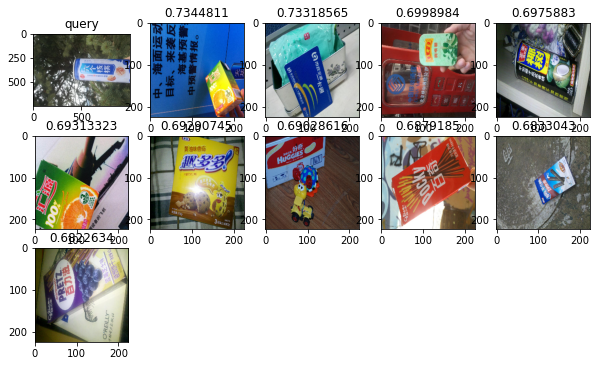

457 0.8328484
3512 0.8099696
1137 0.8079314
1459 0.79457647
1612 0.7921379
4421 0.78821653
2935 0.783574
1507 0.7832955
3825 0.7828294
3366 0.7811992
Q18: 457 3512 1137 1459 1612 4421 2935 1507 3825 3366 


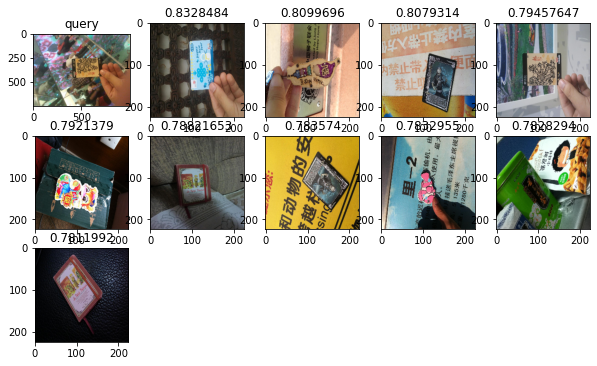

672 0.83309674
2715 0.764359
4077 0.7639483
3113 0.7414099
1425 0.7308501
3521 0.73015594
217 0.7274862
3259 0.72640514
3559 0.7255697
2125 0.72118497
Q19: 672 2715 4077 3113 1425 3521 217 3259 3559 2125 


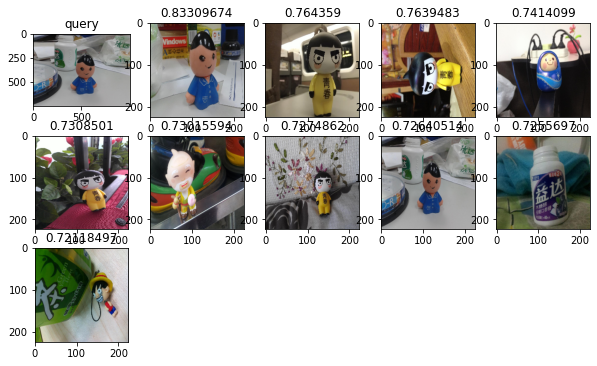

702 0.79252464
362 0.7911619
709 0.7840492
137 0.78254056
457 0.780207
4995 0.77897125
437 0.77784806
438 0.7765459
988 0.77475476
1459 0.7747397
Q20: 702 362 709 137 457 4995 437 438 988 1459 


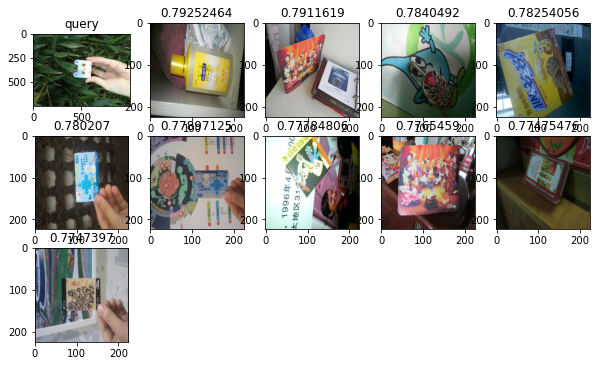

In [7]:
queryf_dir = './datasets_4186/query_feature/'
gallery_dir = './datasets_4186/gallery_feature/'
query_dir = './datasets_4186/query_4186/'

count = 1
resultRows = []

for queryf_file in os.listdir(queryf_dir):
    best_ten = retrival_idx(os.path.join(queryf_dir, queryf_file), gallery_dir, similarityType = similarity) # retrieve top 10 matching images in the gallery.

    if similarity != 'euclidean':
        best_ten.reverse()

    rowString = "Q{}: ".format(count)

    similarImages = []
    for i in best_ten:
        print(i[0][:-4], i[1])
        rowString = rowString + i[0][:-4] + " "

    print(rowString)
    resultRows.append(rowString)
    visualization(best_ten, os.path.join(query_dir, queryf_file[:-10] + '.jpg')) # Visualize the retrieval results
    count+=1


In [8]:
with open('results/rankList_vgg19_{}.txt'.format(similarity),'a') as f:
    for row in resultRows:
        f.write('{}\n'.format(row))
    f.close()